In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Sem 7/review project/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df_copy = df.drop(['id','brand','manufacturer','manufacturerNumber','dateAdded','dateUpdated',"asins",'imageURLs','keys','reviews.didPurchase','reviews.date','reviews.dateSeen','reviews.doRecommend','reviews.id','reviews.numHelpful','reviews.sourceURLs','reviews.username','sourceURLs'],axis=1)
df_copy['categories'][0].split(',')
# df_copy.head()
for i in range(len(df_copy)):
    df_copy['categories'][i] = df_copy['categories'][i].split(',')
df_copy.head()

<ipython-input-4-8e0ba80d6ebb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['categories'][i] = df_copy['categories'][i].split(',')


,name,categories,primaryCategories,reviews.rating,reviews.text,reviews.title
0,AmazonBasics AAA Performance Alkaline Batterie...,"[AA, AAA, Health, Electronics, Health & Househ...",Health & Beauty,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AmazonBasics AAA Performance Alkaline Batterie...,"[AA, AAA, Health, Electronics, Health & Househ...",Health & Beauty,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AmazonBasics AAA Performance Alkaline Batterie...,"[AA, AAA, Health, Electronics, Health & Househ...",Health & Beauty,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AmazonBasics AAA Performance Alkaline Batterie...,"[AA, AAA, Health, Electronics, Health & Househ...",Health & Beauty,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AmazonBasics AAA Performance Alkaline Batterie...,"[AA, AAA, Health, Electronics, Health & Househ...",Health & Beauty,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


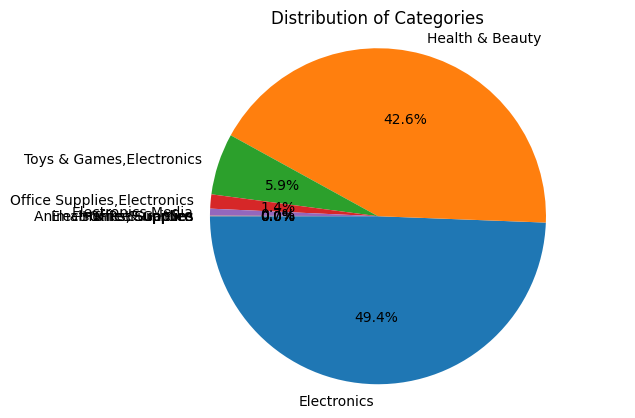

In [5]:
value_counts = df_copy['primaryCategories'].value_counts()

# Plot a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [6]:
df_copy['name'].value_counts()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)                               8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary           3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers        2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black    2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case                   1676
                                                                                         ... 
Echo Dot (Previous generation)                                                              1
AmazonBasics Single-Door Folding Metal Dog Crate - Large (42x28x30 Inches)                  1
AmazonBasics Silicone Hot Handle Cover/Holder - Red                                         1
Two Door Top Load Pet Kennel Travel Crate Dog Cat Pet Cage Carrier Box Tray 23"             1
Amazon Echo Show - Black                                    

In [7]:
# corpus = df_copy['reviews.text']

# # CountVectorizer converts text data into a term frequency matrix
# count_vectorizer = CountVectorizer()
# tf_matrix = count_vectorizer.fit_transform(corpus)

# # TfidfTransformer transforms the term frequency matrix into a TF-IDF matrix
# tfidf_transformer = TfidfTransformer()
# tfidf_matrix = tfidf_transformer.fit_transform(tf_matrix)

# print(tfidf_matrix.toarray())

In [8]:
from textblob import TextBlob
labels = []
for i in df_copy['reviews.text']:
  blob = TextBlob(i)
  sentiment = blob.sentiment
  if sentiment.polarity > 0:
    labels.append("positive")
  elif sentiment.polarity < 0:
    labels.append("negative")
  else:
    labels.append("neutral")

In [9]:
# Example text data and labels
corpus = df_copy['reviews.text']

# Create a CountVectorizer to convert text to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Create and train the Multinomial Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

    negative       0.48      0.51      0.49       415
     neutral       0.85      0.17      0.28       498
    positive       0.89      0.96      0.92      4754

    accuracy                           0.85      5667
   macro avg       0.74      0.54      0.56      5667
weighted avg       0.85      0.85      0.83      5667



In [10]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create and train the LinearSVC model
svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.83      0.83       415
     neutral       0.92      0.95      0.93       498
    positive       0.98      0.98      0.98      4754

    accuracy                           0.97      5667
   macro avg       0.91      0.92      0.92      5667
weighted avg       0.97      0.97      0.97      5667



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

    negative       0.95      0.54      0.69       415
     neutral       0.92      0.77      0.84       498
    positive       0.94      0.99      0.97      4754

    accuracy                           0.94      5667
   macro avg       0.94      0.77      0.83      5667
weighted avg       0.94      0.94      0.93      5667



In [18]:
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = lr_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.81      0.83       415
     neutral       0.91      0.94      0.93       498
    positive       0.98      0.98      0.98      4754

    accuracy                           0.97      5667
   macro avg       0.91      0.91      0.91      5667
weighted avg       0.97      0.97      0.97      5667



In [13]:
predicted_sentiments = []
sia = SentimentIntensityAnalyzer()
for text in corpus:
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        predicted_sentiments.append('positive')
    elif sentiment_scores['compound'] <= -0.05:
        predicted_sentiments.append('negative')
    else:
        predicted_sentiments.append('neutral')

In [14]:
corpus = df_copy['reviews.text']

# Create a CountVectorizer to convert text to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Create and train the Multinomial Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

    negative       0.48      0.51      0.49       415
     neutral       0.85      0.17      0.28       498
    positive       0.89      0.96      0.92      4754

    accuracy                           0.85      5667
   macro avg       0.74      0.54      0.56      5667
weighted avg       0.85      0.85      0.83      5667



In [15]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create and train the LinearSVC model
svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.83      0.83       415
     neutral       0.92      0.95      0.93       498
    positive       0.98      0.98      0.98      4754

    accuracy                           0.97      5667
   macro avg       0.91      0.92      0.92      5667
weighted avg       0.97      0.97      0.97      5667



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

    negative       0.95      0.54      0.69       415
     neutral       0.92      0.77      0.84       498
    positive       0.94      0.99      0.97      4754

    accuracy                           0.94      5667
   macro avg       0.94      0.77      0.83      5667
weighted avg       0.94      0.94      0.93      5667



In [17]:
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = lr_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.81      0.83       415
     neutral       0.91      0.94      0.93       498
    positive       0.98      0.98      0.98      4754

    accuracy                           0.97      5667
   macro avg       0.91      0.91      0.91      5667
weighted avg       0.97      0.97      0.97      5667



In [25]:
sample_text = "This movie was amazing. I loved every minute of it!"

# Preprocess the sample text using the same vectorizer
sample_text_features = vectorizer.transform([sample_text])

# Predict sentiment using the trained Linear Regression model
predicted_sentiment = lr_classifier.predict(sample_text_features)
predicted_sentiment

array(['positive'], dtype='<U8')